In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split, GridSearchCV
from sklearn import preprocessing, linear_model
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [2]:
train = pd.read_csv('boston_housing/train.csv')
test = pd.read_csv('boston_housing/test.csv')
df = train.append(test).reset_index(drop=True)

In [3]:
df

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,496,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60,NaN
502,497,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,NaN
503,499,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,NaN
504,501,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,NaN


In [4]:
train.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
test.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

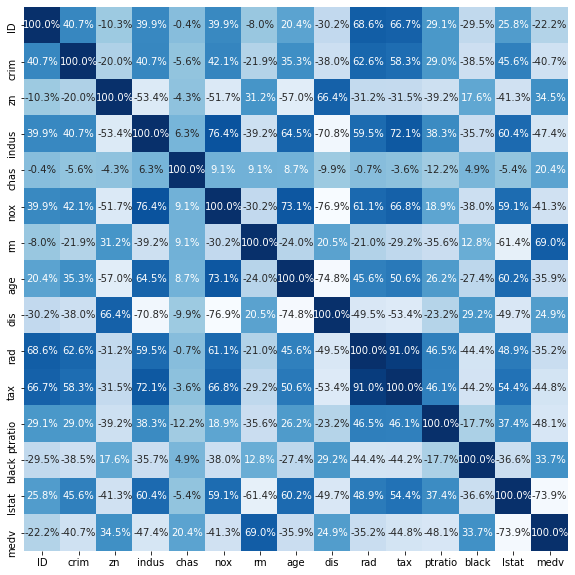

In [6]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=False, square= True, fmt='.1%', annot=True, cmap='Blues');

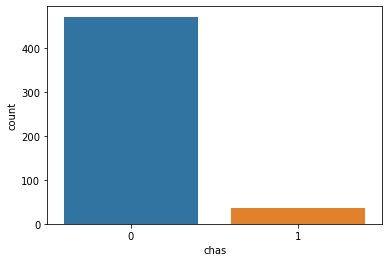

In [7]:
# chech the value of chas
sns.countplot(x='chas',data=df);

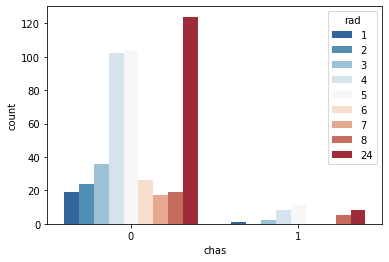

In [8]:
sns.countplot(x='chas',hue='rad',data=df,palette='RdBu_r');
# can do the one hot encoding

In [9]:
df = pd.get_dummies(df, columns=['chas', 'rad'])

In [10]:
# chech the value of rad
# sns.countplot(x='rad',data=df);

In [11]:
# r4 = pd.cut(df.rad, 4)
# r5 = pd.cut(df.rad, 5)
# r6 = pd.cut(df.rad, 6)
# df['rad4'] = LabelEncoder().fit_transform(r4)
# df['rad5'] = LabelEncoder().fit_transform(r5) 
# df['rad6'] = LabelEncoder().fit_transform(r6) 

In [12]:
df

,ID,crim,zn,indus,nox,rm,age,dis,tax,ptratio,...,chas_1,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,1,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,...,0,1,0,0,0,0,0,0,0,0
1,2,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242,17.8,...,0,0,1,0,0,0,0,0,0,0
2,4,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222,18.7,...,0,0,0,1,0,0,0,0,0,0
3,5,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222,18.7,...,0,0,0,1,0,0,0,0,0,0
4,7,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,311,15.2,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,496,0.17899,0.0,9.69,0.585,5.670,28.8,2.7986,391,19.2,...,0,0,0,0,0,0,1,0,0,0
502,497,0.28960,0.0,9.69,0.585,5.390,72.9,2.7986,391,19.2,...,0,0,0,0,0,0,1,0,0,0
503,499,0.23912,0.0,9.69,0.585,6.019,65.3,2.4091,391,19.2,...,0,0,0,0,0,0,1,0,0,0
504,501,0.22438,0.0,9.69,0.585,6.027,79.7,2.4982,391,19.2,...,0,0,0,0,0,0,1,0,0,0


In [13]:
df_train = df[:len(train)]
df_test = df[len(train):]

In [14]:
x = pd.concat([df_train.iloc[:, 0:12], df_train.iloc[:, 13:]], axis=1)
y = np.round(df_train['medv'])
bf = SelectKBest(score_func=chi2, k=4)
f = bf.fit(x, y)
featureScores = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(f.scores_)],axis=1)
featureScores.columns = ['Attribute','Score']
featureScores

,Attribute,Score
0,ID,5213.133252
1,crim,3251.396750
2,zn,4193.279045
3,indus,618.607714
4,nox,3.292260
5,rm,14.620403
6,age,1659.128989
7,dis,106.642659
8,tax,9441.032032
9,ptratio,30.474467


In [15]:
print(featureScores.nlargest(9,'Score'))

   Attribute        Score
8        tax  9441.032032
0         ID  5213.133252
2         zn  4193.279045
1       crim  3251.396750
10     black  2440.426651
6        age  1659.128989
11     lstat   972.176726
3      indus   618.607714
7        dis   106.642659


In [16]:
# feature and data sample size are small. Choose to not filter out any features
# X = df_train[['ID', 'tax', 'zn', 'crim', 'black', 'age', 'lstat', 'rad', 'indus']]
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
Y = df_train.iloc[:,12]
Y

0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
       ... 
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: medv, Length: 333, dtype: float64

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.20, random_state=0, shuffle=True)

In [18]:
df_test = df_test.drop(['medv'], axis=1)
out = df_test['ID']
df_test = scaler.transform(df_test)

In [38]:
train_rmse = []
test_rmse = []
generlization_rmse = []
for n in range(50, 350, 50):
    for cols_fraction in np.arange(0.1, 1.0, 0.1):
        model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = cols_fraction, n_estimators = n)
        model.fit(x_train, y_train)
        rmse_tr = mean_squared_error(model.predict(x_train), y_train)**0.5
        rmse_te = mean_squared_error(model.predict(x_test), y_test)**0.5
        print('training RMSE:{:.2f}, validation set RMSE:{:.2f} '.format(rmse_tr, rmse_te))
        train_rmse.append((n, cols_fraction, rmse_tr))
        test_rmse.append((n, cols_fraction, rmse_te))
        generlization_rmse.append((n, cols_fraction, rmse_te-rmse_tr))

training RMSE:0.56, validation set RMSE:3.75 
training RMSE:0.33, validation set RMSE:3.14 
training RMSE:0.21, validation set RMSE:2.87 
training RMSE:0.15, validation set RMSE:3.20 
training RMSE:0.17, validation set RMSE:3.44 
training RMSE:0.17, validation set RMSE:3.28 
training RMSE:0.13, validation set RMSE:3.19 
training RMSE:0.12, validation set RMSE:3.58 
training RMSE:0.11, validation set RMSE:3.38 
training RMSE:0.22, validation set RMSE:3.71 
training RMSE:0.08, validation set RMSE:3.13 
training RMSE:0.03, validation set RMSE:2.86 
training RMSE:0.02, validation set RMSE:3.20 
training RMSE:0.02, validation set RMSE:3.44 
training RMSE:0.01, validation set RMSE:3.30 
training RMSE:0.01, validation set RMSE:3.19 
training RMSE:0.01, validation set RMSE:3.58 
training RMSE:0.01, validation set RMSE:3.39 
training RMSE:0.08, validation set RMSE:3.71 
training RMSE:0.02, validation set RMSE:3.13 
training RMSE:0.00, validation set RMSE:2.86 
training RMSE:0.00, validation set

In [39]:
best = generlization_rmse.index(min(generlization_rmse, key=lambda x:x[2]))
print('best n_estimator: {}, best colsample_bytree {:.2f}'.format(generlization_rmse[best][0], generlization_rmse[best][1]))

best n_estimator: 50, best colsample_bytree 0.30


In [22]:
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, n_estimators = 100)
model.fit(x_train, y_train)
print(' model training set RMSE:{}'.format(mean_squared_error(model5.predict(x_train), y_train) ** 0.5))
print(' model validation set RMSE:{}'.format(mean_squared_error(model5.predict(x_test), y_test) ** 0.5))

 model 5 training set RMSE:0.03135112638533489
 model 5 validation set RMSE:2.8634871524931182


In [23]:
pred = model.predict(df_test)

In [24]:
out1 = pd.concat([out, pd.DataFrame(pred, columns=['medv'])], axis=0)
out1.to_csv('xgb_predictions2.csv', index=False)